# Isolation Forest
*For Anomaly Detection*

Isolation forest is decision tree based ensemble method that explicitly identifies **anomalous** datapoints. This is in contrast to profiling normal instances and then identifying the instances which don't conform to this profile. Anomalies are few and have feature-values that are different from normal points. Isolation forest capitalizes on these characteristics of anomalies. I present a small example before proceeding with the technical aspects of then algorithm.

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from resources.utils import conf_matrix

# default plot settings
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['axes.facecolor'] = 'lightskyblue'
plt.rcParams['axes.titlepad'] = 35.0
rng = np.random.RandomState(42)

In [2]:
'''Initialize Models Here'''
clf = IsolationForest(behaviour='new', max_samples=100,
                      random_state=rng, contamination=0.11)


In [3]:
distributions = ['normal', 'poisson', 'exponential', 'gumbel']
regular_dist = np.random.choice(distributions,1)[0] 
irregular_dist = np.random.choice(list(filter(lambda x: x != regular_dist, distributions)), 1)[0]

data_gen = getattr(rng,regular_dist)
anomaly_gen = getattr(rng, irregular_dist)

print("regular distribution is : {}".format(regular_dist))
print("anomalous distribution is : {}".format(irregular_dist))

regular distribution is : normal
anomalous distribution is : exponential


In [4]:
'''train data'''
X_train = 0.2 * data_gen(size=(1000, 2))
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])
print("training: {}".format(X_train.shape))

'''regular test data'''
X_test = 0.2* data_gen(size=(200, 2))
X_test = np.r_[X_test+3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])
print("normal test: {}".format(X_test.shape))

'''anomalous test data'''
X_outliers = anomaly_gen(size=(100,2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])
print("anomalous test: {}".format(X_outliers.shape))


training: (2000, 2)
normal test: (400, 2)
anomalous test: (100, 2)


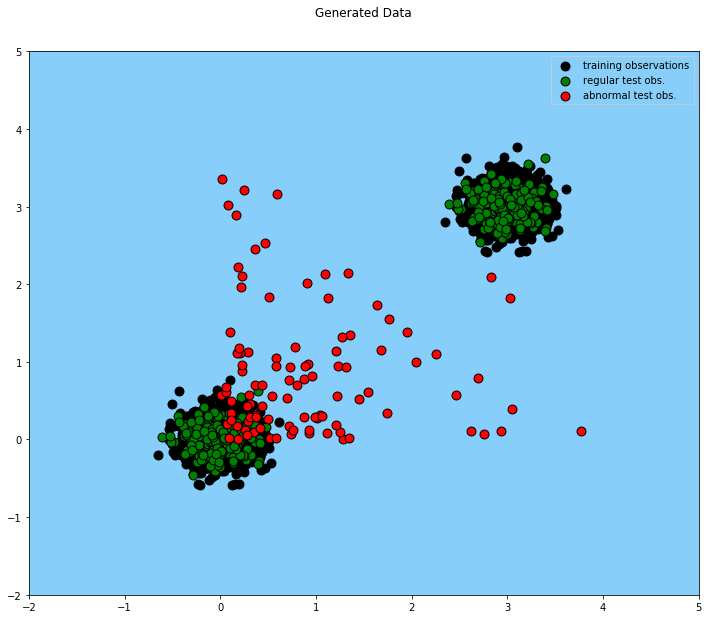

In [8]:
'''Plotting generated data ----'''

plt.title("Generated Data")

p1 = plt.scatter(X_train.x1, X_train.x2, c='black',
                 s=20*4, edgecolor='k')
p2 = plt.scatter(X_test.x1, X_test.x2, c='green',
                 s=20*4, edgecolor='k')
p3 = plt.scatter(X_outliers.x1, X_outliers.x2, c='red',
                s=20*4, edgecolor='k')

plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))
plt.legend([p1, p2, p3],
           ["training observations",
            "regular test obs.", "abnormal test obs."],
           loc="best")

plt.show()

In [9]:

clf.fit(X_train)

'''predictions'''
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

'''accuracies'''
print("Accuracy on normal samples: {}".format(list(y_pred_test).count(1)/y_pred_test.shape[0]))
print("Accuracy on anomalous samples: {}".format(list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0]))

Accuracy on normal samples: 0.915
Accuracy on anomalous samples: 0.89


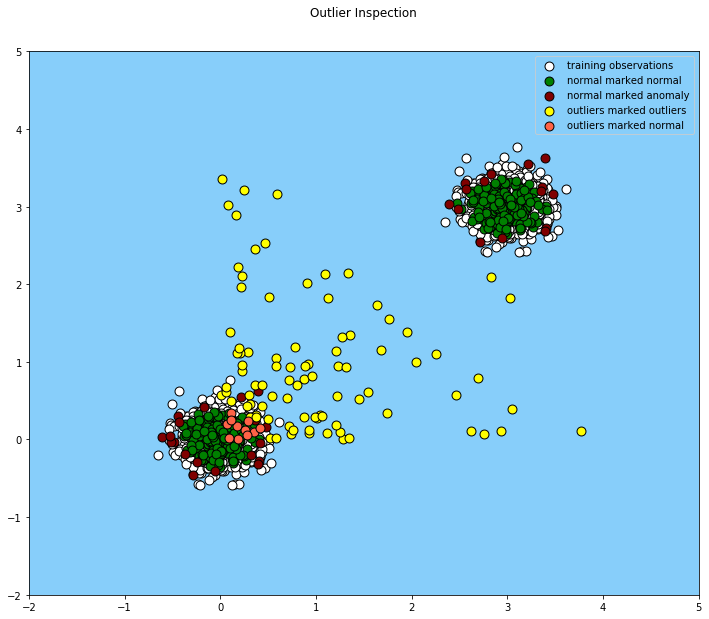

In [10]:
'''Plotting predictions'''

X_outliers = X_outliers.assign(y = y_pred_outliers)
X_test = X_test.assign(y = y_pred_test)

plt.title("Outlier Inspection")

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*4, edgecolor='k')
p2 = plt.scatter(X_test.loc[X_test.y == 1, ['x1']], 
                 X_test.loc[X_test.y == 1, ['x2']], 
                 c='green', s=20*4, edgecolor='k')
p3 = plt.scatter(X_test.loc[X_test.y == -1, ['x1']], 
                 X_test.loc[X_test.y == -1, ['x2']], 
                 c='maroon', s=20*4, edgecolor='k')
p4 = plt.scatter(X_outliers.loc[X_outliers.y == -1, ['x1']], 
                 X_outliers.loc[X_outliers.y == -1, ['x2']], 
                 c='yellow', s=20*4, edgecolor='k')
p5 = plt.scatter(X_outliers.loc[X_outliers.y == 1, ['x1']], 
                 X_outliers.loc[X_outliers.y == 1, ['x2']], 
                 c='tomato', s=20*4, edgecolor='k')

plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))
plt.legend([p1, p2, p3, p4, p5],
           ["training observations",
            "normal marked normal",
            "normal marked anomaly",
            "outliers marked outliers", 
            "outliers marked normal"],
           loc="best")

plt.show()

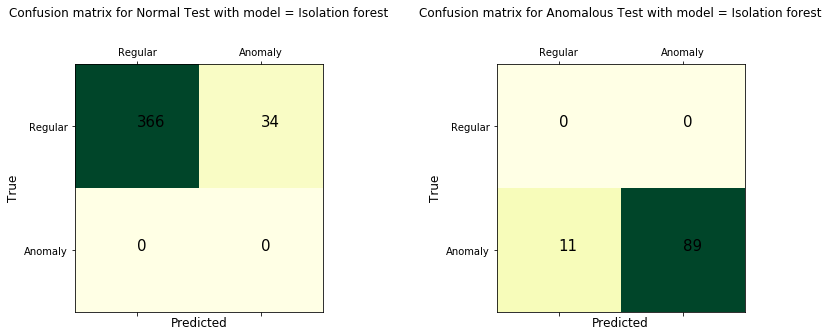

In [11]:
'''Confusion Matrix for test set (regular observations)'''
y_test_test = [1]*X_test.shape[0]
fig1 = plt.figure(figsize=(12,10))
conf_matrix(y_test_test, y_pred_test, fig1, z=1, split_name="Normal Test")

'''Confusion Matrix for test set (anomalies)'''
y_test_outliers = [-1]*X_outliers.shape[0]
conf_matrix(y_test_outliers, y_pred_outliers, fig1, z=2, split_name="Anomalous Test")

fig1.subplots_adjust(wspace=0.7)
plt.show()
